<a href="https://colab.research.google.com/github/GeeteshT/Project/blob/master/Sparks_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url="http://bit.ly/w-data"

df=pd.read_csv(url)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

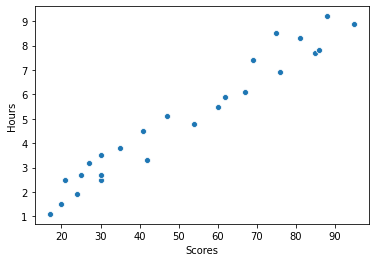

In [ ]:
sns.scatterplot(x="Scores",y="Hours",data=df,)

As we can see that Scores increases with respect to the of hours.

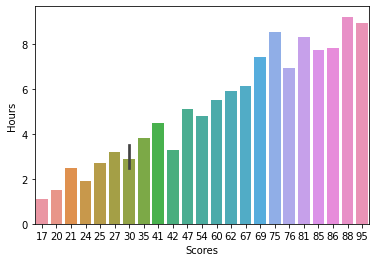

In [ ]:
sns.barplot(x="Scores",y="Hours",data=df)

As we can see that the scores increases with repect to the No.of hours.

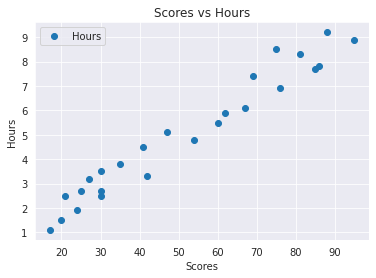

In [ ]:
df.plot(x='Scores', y='Hours', style='o')  
plt.title('Scores vs Hours')  
plt.xlabel('Scores')  
plt.ylabel('Hours')  
plt.show()

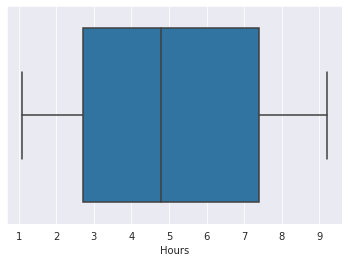

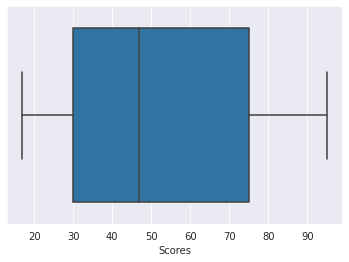

In [ ]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

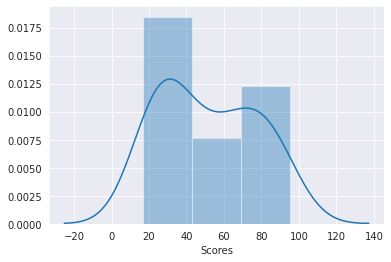

In [ ]:
sns.distplot(df["Scores"])

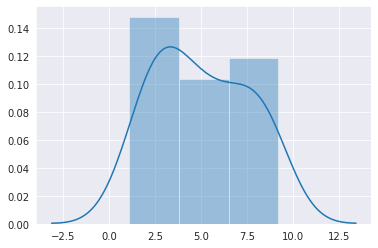

In [28]:
sns.distplot([df["Hours"]])

In [ ]:
for col in df.columns:
  print("==={}===".format(col))
  print(df[col].value_counts())

===Hours===
2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64
===Scores===
30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
X= df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
train, test= train_test_split(df, test_size=0.2,random_state=0)

In [ ]:
x_train=train.drop("Scores", axis=1)
y_train=train["Scores"]
x_test=test.drop("Scores", axis=1)
y_test=test["Scores"]

In [ ]:
lm= LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

2.018160041434662

In [ ]:
lm.coef_

array([9.91065648])

# **Plotting the Regressor Line**

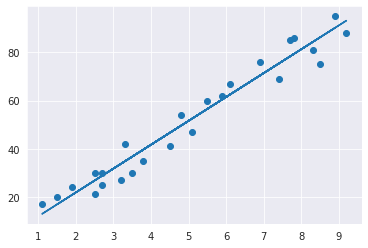

In [ ]:
line= lm.coef_*X+ lm.intercept_

# Plotting the test data

plt.scatter(X,y)
plt.plot(X, line);
plt.show()

In [ ]:
print(x_test)
predicted= lm.predict(x_test)
print(predicted)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
# Comparing Actual vs Predicted

df_new= pd.DataFrame({"Actual":y_test, "Predicted":predicted})

df_new

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
# Predicting the for 9.25 hours
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:
print("Mean_absolute_error= {}".format(mean_absolute_error(y_test,predicted)))

Mean_absolute_error= 4.183859899002982
